In [1]:
import matplotlib.pyplot as plt
import numpy as np

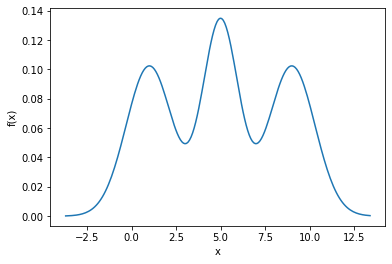

In [2]:
import numpy as np
import numpy.random
import scipy.stats as ss
import matplotlib.pyplot as plt

# Set-up.
n = 10000
numpy.random.seed(0x5eed)
# Parameters of the mixture components
norm_params = np.array([[5, 1],
                        [1, 1.3],
                        [9, 1.3]])
n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
weights = np.ones(n_components, dtype=np.float64) / 3.0
# A stream of indices from which to choose the component
mixture_idx = numpy.random.choice(len(weights), size=n, replace=True, p=weights)
# y is the mixture sample
y = numpy.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)

for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w

#plt.hist(y,  bins="fd")
plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [3]:
import numpy as np
import numpy.random
import scipy.stats as ss
import matplotlib.pyplot as plt

# Set-up.
n = 10000
numpy.random.seed(0x5eed)
# Parameters of the mixture components
norm_params = np.array([[20, 15],
                        [70, 15],
                        [100, 9]])
n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
weights = np.ones(n_components, dtype=np.float64) / 3.0
# A stream of indices from which to choose the component
mixture_idx = numpy.random.choice(len(weights), size=n, replace=True, p=weights)
# y is the mixture sample
y = numpy.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

# Theoretical PDF plotting -- generate the x and y plotting positions
xs1 = np.linspace(y.min(), y.max(), 200)
ys1 = np.zeros_like(xs)

for (l, s), w in zip(norm_params, weights):
    ys1 += ss.norm.pdf(xs1, loc=l, scale=s) * w

In [4]:
# Set-up.
n = 10000
numpy.random.seed(0x5eed)
# Parameters of the mixture components
norm_params = np.array([[25, 14],
                        [60, 11],
                        [110, 18],
                        [160, 8]])
n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
weights = np.ones(n_components, dtype=np.float64) / 4.0
# A stream of indices from which to choose the component
mixture_idx = numpy.random.choice(len(weights), size=n, replace=True, p=weights)
# y is the mixture sample
y = numpy.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

# Theoretical PDF plotting -- generate the x and y plotting positions
xs2 = np.linspace(y.min(), y.max(), 200)
ys2 = np.zeros_like(xs)

for (l, s), w in zip(norm_params, weights):
    ys2 += ss.norm.pdf(xs2, loc=l, scale=s) * w
ys2 *= 1.5

### Draw Figure

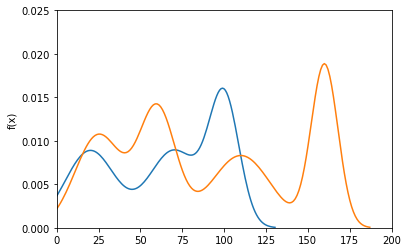

In [5]:
plt.plot(xs1, ys1)
plt.plot(xs2, ys2)
plt.xlim(0,200)
plt.ylim(0, 0.025)
plt.xlabel("")
plt.ylabel("f(x)")
plt.show()

In [6]:
from matplotlib.pyplot import figure
import matplotlib
figure(figsize=(8, 6), dpi=80)
font = {#'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

<Figure size 640x480 with 0 Axes>

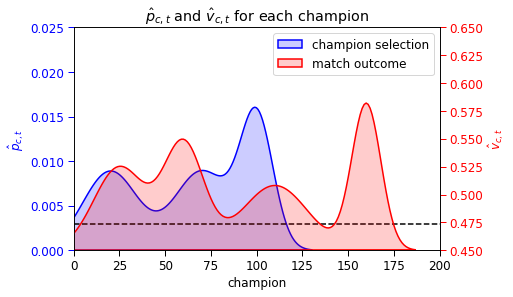

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)

twin = ax.twinx()
p1 = ax.fill(xs1, ys1, 
              facecolor=(0,0,1,0.2), 
              edgecolor='b',
              linewidth=1.5,
              label="champion selection")
p2 = twin.fill(xs2, 7*(ys2)+0.45, 
               facecolor=(1,0,0,0.2), 
               edgecolor='r', 
               linewidth=1.5,
               label="match outcome")

ax.plot([0,200],[0.003, 0.003], 'k--')

plt.title(r'$\hat{p}_{c,t}$ and $\hat{v}_{c,t}$ for each champion')
ax.set_xlabel("champion")
ax.set_xlim(0, 200)

ax.set_ylabel(r"$\hat{p}_{c,t}$")
ax.set_ylim(0, 0.025)
ax.yaxis.label.set_color('b')
twin.set_ylabel(r"$\hat{v}_{c,t}$")
twin.set_ylim(0.45, 0.65)
twin.yaxis.label.set_color('r')

tkw = dict(size=6, width=1)
ax.tick_params(axis='y', colors='b', **tkw)
twin.tick_params(axis='y', colors='r', **tkw)
ax.tick_params(axis='x', **tkw)

plots = p1 + p2
labels = [p.get_label() for p in plots]
ax.legend(plots, labels, loc=0)
plt.tight_layout(pad=0.2)
plt.show()

In [16]:
fig.savefig('probability_distribution.png', dpi=100, transparent=True)

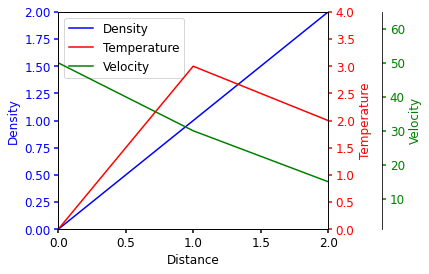

In [9]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = twin1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
twin1.set_ylim(0, 4)
twin2.set_ylim(1, 65)

ax.set_xlabel("Distance")
ax.set_ylabel("Density")
twin1.set_ylabel("Temperature")
twin2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])

plt.show()